In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nicholasjhana/energy-consumption-generation-prices-and-weather")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/energy-consumption-generation-prices-and-weather


In [8]:
import os

# تحديد المسار المحمل منه
data_path = "/root/.cache/kagglehub/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/versions/1"

# عرض الملفات الموجودة
print(os.listdir(data_path))


['weather_features.csv', 'energy_dataset.csv']


In [9]:
import pandas as pd
import os

# مسار الملفات
data_path = "/root/.cache/kagglehub/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/versions/1"

# تحميل قواعد البيانات
energy_df = pd.read_csv(os.path.join(data_path, 'energy_dataset.csv'))
weather_df = pd.read_csv(os.path.join(data_path, 'weather_features.csv'))

# -----------------------
# استعراض قاعدة بيانات الطاقة
print("\n🔷🔷 Energy Dataset 🔷🔷")
print("\n🔹 First 5 rows:")
print(energy_df.head())

print("\n🔹 Dataset Info:")
print(energy_df.info())

print("\n🔹 Statistical Summary:")
print(energy_df.describe())

print("\n🔹 Missing Values:")
print(energy_df.isnull().sum())

# -----------------------
# استعراض قاعدة بيانات الطقس
print("\n🔷🔷 Weather Dataset 🔷🔷")
print("\n🔹 First 5 rows:")
print(weather_df.head())

print("\n🔹 Dataset Info:")
print(weather_df.info())

print("\n🔹 Statistical Summary:")
print(weather_df.describe())

print("\n🔹 Missing Values:")
print(weather_df.isnull().sum())



🔷🔷 Energy Dataset 🔷🔷

🔹 First 5 rows:
                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1            

 Energy Dataset
عدد الصفوف: حوالي 35064


عدد الأعمدة: 29


تحتوي أعمدة متعلقة بـ:


إنتاج الكهرباء من مصادر مختلفة (generation fossil gas, solar, hydro, ...)


استهلاك الكهرباء (total load actual)


أسعار (price actual, price day ahead)


في بعض القيم المفقودة (مثلاً generation biomass و price actual وغيرها)



 Weather Dataset
عدد الصفوف: حوالي 34952


عدد الأعمدة: 21


تحتوي بيانات طقس لمجموعة مدن (city_name) مثل: Madrid, Barcelona, ...


تشمل أعمدة عن:


درجة الحرارة، الرطوبة، سرعة الرياح، الضغط الجوي، إلخ.


أيضاً في قيم مفقودة كثيرة ببعض الأعمدة، خاصة clouds_all و weather_id


In [12]:
import matplotlib.pyplot as plt

# ✅ تصحيح اسم العمود الزمني في الطقس
print(weather_df.columns)  # لنعرف الاسم الحقيقي


Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')


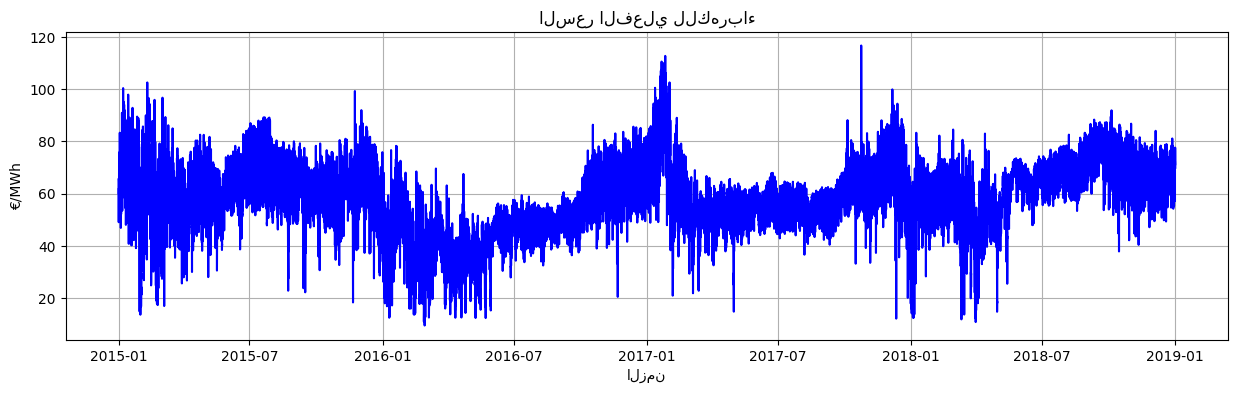

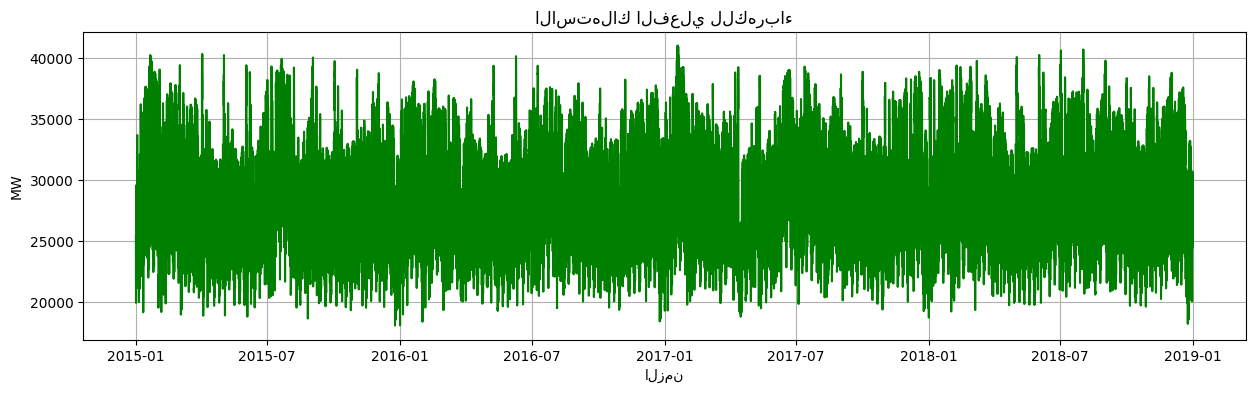

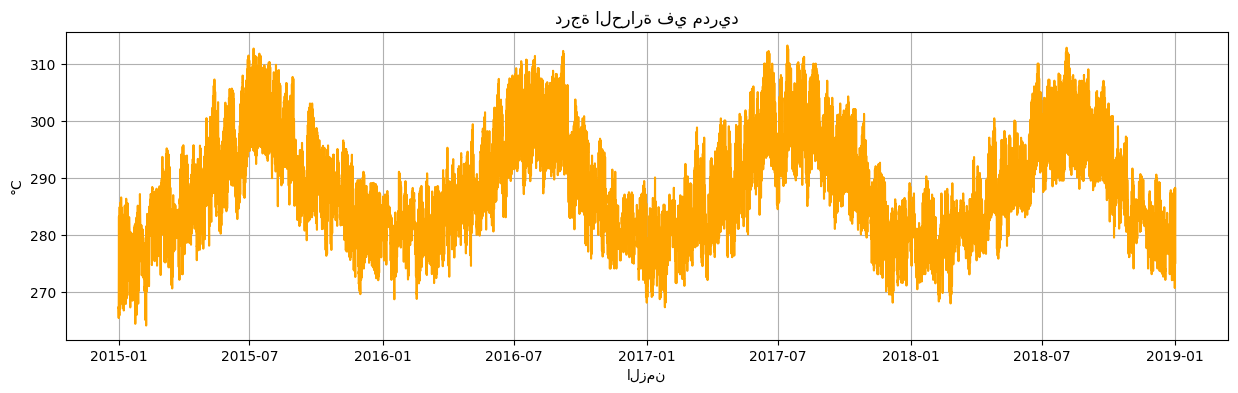

In [13]:
import matplotlib.pyplot as plt

# ✅ تحويل الأعمدة الزمنية بصيغة UTC لتجنب التحذير
energy_df['time'] = pd.to_datetime(energy_df['time'], errors='coerce', utc=True)
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], errors='coerce', utc=True)

# حذف الصفوف اللي فيها تواريخ مفقودة
energy_df.dropna(subset=['time'], inplace=True)
weather_df.dropna(subset=['dt_iso'], inplace=True)

# 📊 السعر الفعلي للكهرباء
plt.figure(figsize=(15, 4))
plt.plot(energy_df['time'], energy_df['price actual'], color='blue')
plt.title('السعر الفعلي للكهرباء')
plt.xlabel('الزمن')
plt.ylabel('€/MWh')
plt.grid(True)
plt.show()

# 📊 الاستهلاك الفعلي للكهرباء
plt.figure(figsize=(15, 4))
plt.plot(energy_df['time'], energy_df['total load actual'], color='green')
plt.title('الاستهلاك الفعلي للكهرباء')
plt.xlabel('الزمن')
plt.ylabel('MW')
plt.grid(True)
plt.show()

# 📊 درجة الحرارة في مدريد
weather_madrid = weather_df[weather_df['city_name'] == 'Madrid']

plt.figure(figsize=(15, 4))
plt.plot(weather_madrid['dt_iso'], weather_madrid['temp'], color='orange')
plt.title('درجة الحرارة في مدريد')
plt.xlabel('الزمن')
plt.ylabel('°C')
plt.grid(True)
plt.show()


In [14]:
# ✅ تعويض القيم المفقودة في energy_df

for col in energy_df.columns:
    if energy_df[col].dtype == 'float64' or energy_df[col].dtype == 'int64':
        energy_df[col].fillna(energy_df[col].mean(), inplace=True)
    elif energy_df[col].dtype == 'object':
        energy_df[col].fillna(energy_df[col].mode()[0], inplace=True)

# ✅ تعويض القيم المفقودة في weather_df

for col in weather_df.columns:
    if weather_df[col].dtype == 'float64' or weather_df[col].dtype == 'int64':
        weather_df[col].fillna(weather_df[col].mean(), inplace=True)
    elif weather_df[col].dtype == 'object':
        weather_df[col].fillna(weather_df[col].mode()[0], inplace=True)

print("✅ تم التعويض الذكي للقيم المفقودة.")

# نطبع عدد القيم المفقودة بعد التنظيف
print("\n🔍 القيم المفقودة بعد التنظيف:")
print("\n📘 energy_df:")
print(energy_df.isnull().sum())
print("\n📗 weather_df:")
print(weather_df.isnull().sum())


✅ تم التعويض الذكي للقيم المفقودة.

🔍 القيم المفقودة بعد التنظيف:

📘 energy_df:
time                                               0
generation biomass                                 0
generation fossil brown coal/lignite               0
generation fossil coal-derived gas                 0
generation fossil gas                              0
generation fossil hard coal                        0
generation fossil oil                              0
generation fossil oil shale                        0
generation fossil peat                             0
generation geothermal                              0
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption        0
generation hydro run-of-river and poundage         0
generation hydro water reservoir                   0
generation marine                                  0
generation nuclear                                 0
generation other                                   0
generation other re

/tmp/ipython-input-14-1908822705.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_df[col].fillna(energy_df[col].mean(), inplace=True)
/tmp/ipython-input-14-1908822705.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [15]:
import pandas as pd

# 🔄 تحويل الأعمدة الزمنية إلى datetime
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True, errors='coerce')
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], utc=True, errors='coerce')

# ⏱️ إعادة تسمية عمود الوقت في weather لتوحيده
weather_df.rename(columns={'dt_iso': 'time'}, inplace=True)

# 🏙️ نختار فقط مدينة محددة من الطقس، مثل Madrid
weather_df = weather_df[weather_df['city_name'] == 'Madrid']

# 🧪 نحذف العمود city_name لأنو صار غير ضروري
weather_df.drop(columns=['city_name'], inplace=True)

# 🔗 دمج قواعد البيانات بناءً على الوقت
merged_df = pd.merge_asof(
    energy_df.sort_values('time'),
    weather_df.sort_values('time'),
    on='time',
    direction='nearest'  # بيختار أقرب وقت من الطقس لوقت الطاقة
)

# 🔎 عرض البيانات المدموجة
print("\n🧩 الشكل النهائي للبيانات المدمجة:")
print(merged_df.head())

# 🔍 التحقق من القيم المفقودة بعد الدمج
print("\n❓ القيم المفقودة بعد الدمج:")
print(merged_df.isnull().sum())

# 🧹 تعويض أي قيم مفقودة ناتجة عن الدمج
merged_df.fillna(method='ffill', inplace=True)
merged_df.fillna(method='bfill', inplace=True)

# ✅ التأكد من جاهزية البيانات
print("\n✅ البيانات جاهزة للتدريب.")



🧩 الشكل النهائي للبيانات المدمجة:
                       time  generation biomass  \
0 2014-12-31 23:00:00+00:00               447.0   
1 2015-01-01 00:00:00+00:00               449.0   
2 2015-01-01 01:00:00+00:00               448.0   
3 2015-01-01 02:00:00+00:00               438.0   
4 2015-01-01 03:00:00+00:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.

/tmp/ipython-input-15-1142157938.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df.drop(columns=['city_name'], inplace=True)
/tmp/ipython-input-15-1142157938.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)
/tmp/ipython-input-15-1142157938.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='bfill', inplace=True)


In [18]:
print(weather_df.columns)


Index(['time', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')


In [19]:
# دمج البيانات على أساس الوقت (time) في كلا القاعدتين
merged_df = pd.merge(energy_df, weather_df, on='time', how='inner')

# التأكد من أن البيانات تم دمجها بشكل صحيح
print(merged_df.columns)


Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 

In [20]:
# اختيار الأعمدة المهمة
features = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
            'generation solar', 'temp', 'humidity', 'pressure', 'total load actual', 'total load forecast']
target = 'price actual'

# تنظيف البيانات (إزالة الصفوف التي تحتوي على قيم مفقودة)
model_df = merged_df[features + [target]].dropna()

# التأكد من البيانات التي سيتم استخدامها
print(model_df.head())


   generation biomass  generation fossil brown coal/lignite  \
0               447.0                                 329.0   
1               449.0                                 328.0   
2               448.0                                 323.0   
3               438.0                                 254.0   
4               428.0                                 187.0   

   generation fossil gas  generation solar     temp  humidity  pressure  \
0                 4844.0              49.0  267.325        63       971   
1                 5196.0              50.0  267.325        63       971   
2                 4857.0              50.0  266.186        64       971   
3                 4314.0              50.0  266.186        64       971   
4                 4130.0              42.0  266.186        64       971   

   total load actual  total load forecast  price actual  
0            25385.0              26118.0         65.41  
1            24382.0              24934.0         64.9

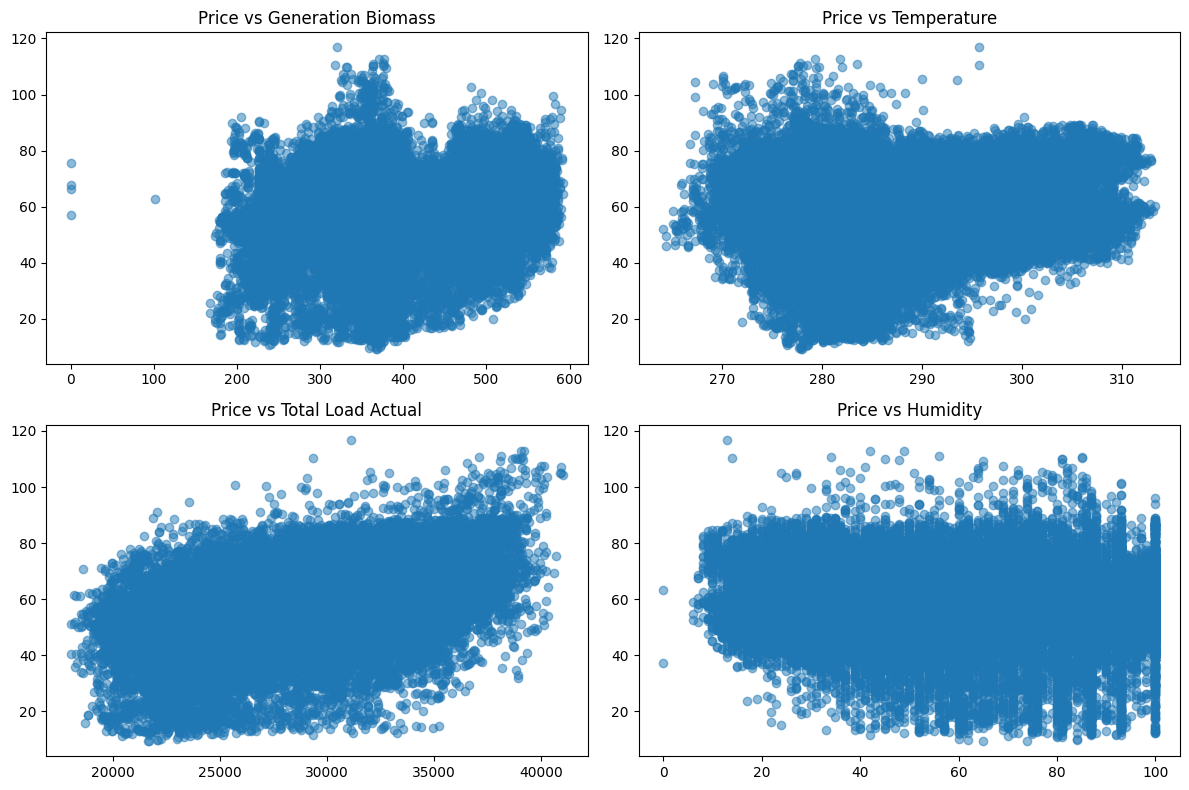

In [21]:
import matplotlib.pyplot as plt

# رسم علاقة السعر الفعلي مع متغيرات مختلفة
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(model_df['generation biomass'], model_df['price actual'], alpha=0.5)
plt.title('Price vs Generation Biomass')

plt.subplot(2, 2, 2)
plt.scatter(model_df['temp'], model_df['price actual'], alpha=0.5)
plt.title('Price vs Temperature')

plt.subplot(2, 2, 3)
plt.scatter(model_df['total load actual'], model_df['price actual'], alpha=0.5)
plt.title('Price vs Total Load Actual')

plt.subplot(2, 2, 4)
plt.scatter(model_df['humidity'], model_df['price actual'], alpha=0.5)
plt.title('Price vs Humidity')

plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# اختيار الميزات المستقلة والمتغير التابع
features = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
            'generation solar', 'temp', 'humidity', 'pressure', 'total load actual', 'total load forecast']
target = 'price actual'

# تنظيف البيانات
model_df = merged_df[features + [target]].dropna()

# تقسيم البيانات إلى ميزات وأهداف
X = model_df[features]
y = model_df[target]

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# استخدام StandardScaler لتحجيم البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# بناء النموذج
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# التنبؤ بالأسعار
y_pred_lr = lr_model.predict(X_test)

# تقييم النموذج
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression MSE: 139.3475583321052
Linear Regression R2: 0.30068457269612914


In [24]:
from sklearn.ensemble import RandomForestRegressor

# بناء النموذج
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# التنبؤ بالأسعار
y_pred_rf = rf_model.predict(X_test)

# تقييم النموذج
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)


Random Forest MSE: 48.96301522484836
Random Forest R2: 0.7542792114631416


In [25]:
from sklearn.svm import SVR

# بناء النموذج
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# التنبؤ بالأسعار
y_pred_svr = svr_model.predict(X_test)

# تقييم النموذج
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR MSE:", mse_svr)
print("SVR R2:", r2_svr)


SVR MSE: 103.09088376513978
SVR R2: 0.48263861746659387


In [26]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# بناء النموذج
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# التنبؤ بالأسعار
y_pred_xgb = xgb_model.predict(X_test)

# تقييم النموذج
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost MSE:", mse_xgb)
print("XGBoost R2:", r2_xgb)


XGBoost MSE: 75.36889819287516
XGBoost R2: 0.621761343535296


In [27]:
from sklearn.neural_network import MLPRegressor

# بناء النموذج
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# التنبؤ بالأسعار
y_pred_nn = nn_model.predict(X_test)

# تقييم النموذج
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print("Neural Network MSE:", mse_nn)
print("Neural Network R2:", r2_nn)


Neural Network MSE: 88.15556209737652
Neural Network R2: 0.5575914977253235


In [28]:
# مقارنة النتائج
results = {
    'Linear Regression': (mse_lr, r2_lr),
    'Random Forest': (mse_rf, r2_rf),
    'SVR': (mse_svr, r2_svr),
    'XGBoost': (mse_xgb, r2_xgb),
    'Neural Network': (mse_nn, r2_nn)
}

# طباعة النتائج
for model_name, (mse, r2) in results.items():
    print(f"{model_name} - MSE: {mse}, R2: {r2}")


Linear Regression - MSE: 139.3475583321052, R2: 0.30068457269612914
Random Forest - MSE: 48.96301522484836, R2: 0.7542792114631416
SVR - MSE: 103.09088376513978, R2: 0.48263861746659387
XGBoost - MSE: 75.36889819287516, R2: 0.621761343535296
Neural Network - MSE: 88.15556209737652, R2: 0.5575914977253235


من النتائج التي تم الحصول عليها، يبدو أن Random Forest هو الأفضل بناءً على MSE و R2.
Random Forest:


MSE: 48.96 (أقل خطأ متوسط مربع، مما يعني دقة أفضل في التنبؤ)


R2: 0.754 (معامل التحديد مرتفع، مما يعني أن النموذج يفسر 75% من التباين في البيانات)


بقية النماذج:
Linear Regression: على الرغم من أنه يقدم R2 منخفضًا جدًا (0.30) و MSE مرتفعًا.


SVR: يقدم نتائج أقل من Random Forest و XGBoost في الأداء.


XGBoost و Neural Network يقدمان نتائج جيدة ولكن ليس بنفس أداء Random Forest.


الاستنتاج:
Random Forest هو النموذج الأفضل في هذه الحالة لأنه يحقق أفضل دقة في التنبؤ (مقارنة بـ MSE و R2).




In [29]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى تدريب واختبار
X = model_df[features]  # المميزات
y = model_df[target]  # الهدف

# تقسيم البيانات إلى 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# طباعة عدد الصفوف في كل مجموعة
print("🔹 Number of training samples (X_train, y_train):", X_train.shape[0])
print("🔹 Number of test samples (X_test, y_test):", X_test.shape[0])


🔹 Number of training samples (X_train, y_train): 29013
🔹 Number of test samples (X_test, y_test): 7254


In [30]:
import joblib

# حفظ النموذج المدرب
joblib.dump(lr_model, 'linear_regression_model.joblib')

# تأكيد حفظ النموذج
print("🔹 Model saved successfully as 'linear_regression_model.joblib'")


🔹 Model saved successfully as 'linear_regression_model.joblib'


In [31]:
import joblib

# تصدير النموذج إلى ملف
joblib.dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [32]:
import joblib

# تصدير نموذج الـ SVR إلى ملف
joblib.dump(svr_model, 'svr_model.joblib')


['svr_model.joblib']

In [33]:
import joblib

# تصدير نموذج XGBoost إلى ملف
joblib.dump(xgb_model, 'xgb_model.joblib')


['xgb_model.joblib']

In [34]:
import joblib

# تصدير نموذج الشبكة العصبية إلى ملف
joblib.dump(nn_model, 'nn_model.joblib')


['nn_model.joblib']